# Projek Akhir Submission : Bike Sharing Datasets

## Struktur Datasets

## Menentukan Pertanyaan Bisnis


1) Bagaimana Korelasi antara Pengguna Terdaftar dan Kasual terhadap Banyaknya Peminjaman Sepeda?
2) Bagaimana Perbedaan Jumlah Peminjaman Sepeda antara Hari Kerja dan Hari Libur?
3) Bagaimana Korelasi jumlah peminjaman Sepeda dengan Faktor Eksternal (Cuaca, Suhu, dll.)?

## Library Dan Package Yang Diguanakan

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [123]:
bike_data = pd.read_csv("data/day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [125]:
bike_data.shape

(731, 16)

**Insight:**
-Data Mempunyai 731 Rows dan 16 Kolomxx

### Assesing Data

In [129]:
bike_data.info() # mengecek data kosong dan tipe data pada dataframe customers_df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [131]:
bike_data.describe() # mengecek ringkasan statistik

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [133]:
print("jumlah missing value")
bike_data.isna().sum() # Mengecek apakah ada missing value

jumlah missing value


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [135]:
print("jumlah data duplikat", bike_data.duplicated().sum()) # mengecek apakah ada data duplikat

jumlah data duplikat 0


In [137]:
bike_data[(bike_data["workingday"] == 0) & (bike_data["holiday"] == 0)] # mengcek apakah ada nilai 0 pada kedua kolom holiday dan workingday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,1248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,2012-12-16,4,1,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742,538,3248,3786
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


**Insight:**
- Tidak ada kolom dengan nilai yang kosong (null)
- Tidak ada nilai duplikat 
- Tidak ada Missing value
- Terdapat 216 data yang mempunyai nilai 0 pada workingday dan holiday
- Terdapat Kesalah Tipe Data pada kolom dteday yang seharusnya berupada datetime

### Cleaning Data

In [141]:
bike_data.loc[bike_data['holiday'] == 0, 'workingday'] = 1 # mengisi data 0 pada working menjadi 1 apabila holiday == 1

In [143]:
bike_data["dteday"] = pd.to_datetime(bike_data["dteday"]) # mengubah tipe data nilai pada kolom dteday menjadi datetime

In [145]:
# melakuakn maping untuk mengganti nilai sehingga dataframe lebih mudah dimengerti
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

bike_data['weekday'] = bike_data['weekday'].replace(weekday_mapping)

month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

bike_data['mnth'] = bike_data['mnth'].replace(month_mapping)

season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

bike_data['season'] = bike_data['season'].replace(season_mapping)

weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

bike_data['weathersit'] = bike_data['weathersit'].replace(weather_mapping) 
bike_data.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
226,227,2011-08-15,Fall,0,Aug,0,Monday,1,Clear,0.665833,0.616167,0.712083,0.208954,775,3563,4338
62,63,2011-03-04,Spring,0,Mar,0,Friday,1,Mist,0.261667,0.255679,0.610417,0.203346,214,1730,1944
464,465,2012-04-09,Summer,1,Apr,0,Monday,1,Clear,0.489167,0.476638,0.317500,0.358196,905,4680,5585
501,502,2012-05-16,Summer,1,May,0,Wednesday,1,Clear,0.636667,0.595975,0.697917,0.122512,991,6433,7424
112,113,2011-04-23,Summer,0,Apr,0,Saturday,1,Mist,0.460000,0.450121,0.887917,0.230725,1462,2574,4036
339,340,2011-12-06,Winter,0,Dec,0,Tuesday,1,Light Snow/Rain,0.462500,0.456400,0.949583,0.232583,126,2468,2594
536,537,2012-06-20,Summer,1,Jun,0,Wednesday,1,Clear,0.782500,0.720975,0.592083,0.113812,872,5339,6211
448,449,2012-03-24,Summer,1,Mar,0,Saturday,1,Mist,0.502500,0.486733,0.885417,0.192783,1033,2339,3372
13,14,2011-01-14,Spring,0,Jan,0,Friday,1,Clear,0.160870,0.188413,0.537826,0.126548,54,1367,1421
318,319,2011-11-15,Winter,0,Nov,0,Tuesday,1,Mist,0.530000,0.507579,0.688750,0.199633,449,3746,4195


In [147]:
bike_data.info() # Mengecek info dari dataframe untuk memastikan kebenaran data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data dteday sudah diperbaiki menjadi datetime
- Nilai pada holiday dan working sudah diperbaiki dengan ketentuan ( apabila 'holiday'==0 maka workingday = 1 )
- Nilai pada kolom ('weekday','mnth','weathersit','season' ) diganti agar dataframe lebih mudah dibaca

## EDA (Exploratory Data Analysis )

### Eksplor Data bike sharing

In [152]:
bike_data.describe(include="all") # Mengecek Ringkasa Statistik pada dataframe

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,0.028728,NaN,0.971272,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,0.000000,NaN,1.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [154]:
bike_data.groupby(by="weekday",observed=False).agg({ # melihat jumlah penyewaan sepeda terbanyak berdasarkan hari
    "cnt": ['max', 'min', 'mean', 'sum'],
})

cnt                           
            max   min         mean     sum
weekday                                   
Friday     8362  1167  4690.288462  487790
Monday     7525    22  4338.123810  455503
Saturday   8714   627  4550.542857  477807
Sunday     8227   605  4228.828571  444027
Thursday   7804   431  4667.259615  485395
Tuesday    7767   683  4510.663462  469109
Wednesday  8173   441  4548.538462  473048

In [156]:
bike_data.groupby(by='mnth').agg({ # melihat jumlah penyewaan sepeda terbanyak berdasarkan bulan
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Apr   7460   795  4484.900000  269094
Aug   7865  1115  5664.419355  351194
Dec   6606   441  3403.806452  211036
Feb   5062  1005  2655.298246  151352
Jan   4521   431  2176.338710  134933
Jul   8173  3285  5563.677419  344948
Jun   8120  3767  5772.366667  346342
Mar   8362   605  3692.258065  228920
May   8294  2633  5349.774194  331686
Nov   6852  1495  4247.183333  254831
Oct   8156    22  5199.225806  322352
Sep   8714  1842  5766.516667  345991

In [158]:
bike_data.groupby('weathersit').agg({ # melihat jumlah penyewaan sepeda terbanyak berdasarkan cuaca
    "cnt":["min","mean","max","sum"]
})

cnt                            
                 min         mean   max      sum
weathersit                                      
Clear            431  4876.786177  8714  2257952
Light Snow/Rain   22  1803.285714  4639    37869
Mist             605  4035.862348  8362   996858

In [160]:
bike_data.groupby('season').agg({ # melihat jumlah penyewaan sepeda terbanyak berdasarkan season
    "cnt":["min","mean","max","sum"]
})

cnt                            
         min         mean   max      sum
season                                  
Fall    1115  5644.303191  8714  1061129
Spring   431  2604.132597  7836   471348
Summer   795  4992.331522  8362   918589
Winter    22  4728.162921  8555   841613

In [162]:
bike_data.corr(numeric_only=True) # Melihat Korelasi Antar Kolom pada dataframe

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866025,0.016145,-0.016145,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
yr,0.866025,1.000000,0.007954,-0.007954,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,0.016145,0.007954,1.000000,-1.000000,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.016145,-0.007954,-1.000000,1.000000,0.028556,0.032507,0.015937,-0.006292,-0.054274,0.108745,0.068348
temp,0.150580,0.047604,-0.028556,0.028556,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,-0.032507,0.032507,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,-0.015937,0.015937,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,0.006292,-0.006292,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.248546,0.054274,-0.054274,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.594248,-0.108745,0.108745,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517


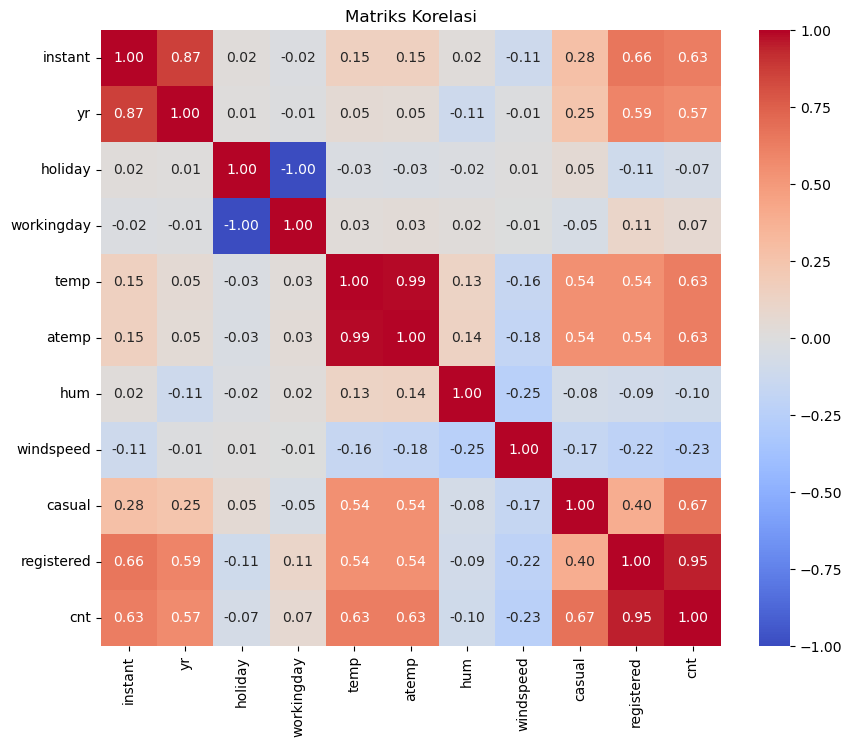

In [164]:
plt.figure(figsize=(10, 8)) #Melihat Korelasi antar kolom dengan diagram heatmap
sns.heatmap(bike_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()

**Insight:**
- berdasarkan ringkasan statistik diketahui bahwa rata-rata peminjaman sepeda setiap harinya adalah 4505 diikuti rata2 peminjaman pengguna yang sudah terdaftar sebanyak 3656 dan pengguna casual sebanyak 848
- berdasarkan hasil eksplorasi data didapatkan, rata-rata peminjaman sepeda terbanyak terdapat pada hari Jumat sebanyak 4690.
- berdasarkan hasil eksplorasi data didapatkan, rata-rata peminjaman sepeda terbanyak terdapat pada bulan september sebanyak 5766.
- berdasarkan hasil eksplorasi data didapatkan, rata-rata peminjaman sepeda terbanyak terdapat pada cuaca clear (cerah) sebanyak 4876.
- berdasarkan hasil eksplorasi data didapatkan, rata-rata peminjaman sepeda terbanyak terdapat pada season fall (gugur) sebanyak 5644.
- berdasarkan diagram heatmap didapat korelasi tertinggi yang mempengaruhi jumlah peminjaman sepeda adalah registered ( pengguna yang terdaftar )

## Eksplanatory & Visualization

### Bagaimana Korelasi antara Pengguna Terdaftar dan Kasual terhadap Banyaknya Peminjaman Sepeda?

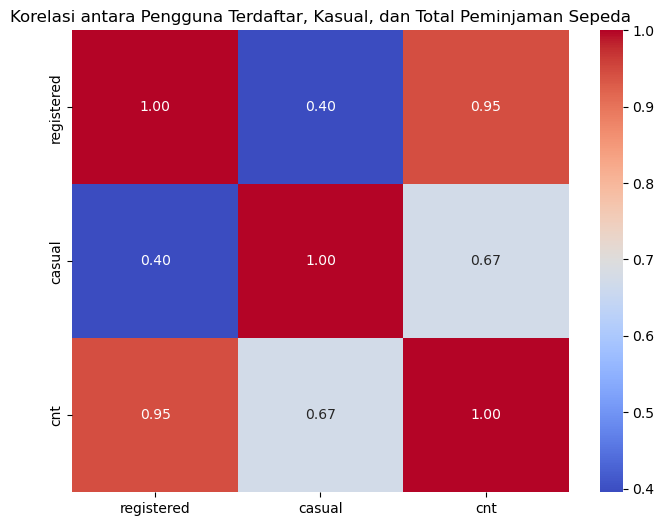

In [169]:
plt.figure(figsize=(8, 6))
sns.heatmap(bike_data[['registered', 'casual', 'cnt']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Pengguna Terdaftar, Kasual, dan Total Peminjaman Sepeda')
plt.show()

**Insight:**
- pada grafik heatmap diatas dapat disimpulkan bahwasanya
    1) Korelasi antara pengguna terdaftar (Registered) terhadap jumlah peminjaman sepeda lebih besar dibandingkan Pengguna Casual
    2) Pengguna terdaftar mempunyai kontribusi lebih besar terhadap jumlah peminjaman sepeda

### Bagaimana Perbedaan Jumlah Peminjaman Sepeda antara Hari Kerja dan Hari Libur?

In [173]:
bike_data_by_workingdays = bike_data.groupby(by="workingday").agg({
    "cnt":"sum"
})

C:\Users\HP\AppData\Local\Temp\ipykernel_11280\1896617470.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(['Holyday', 'Working Day'])


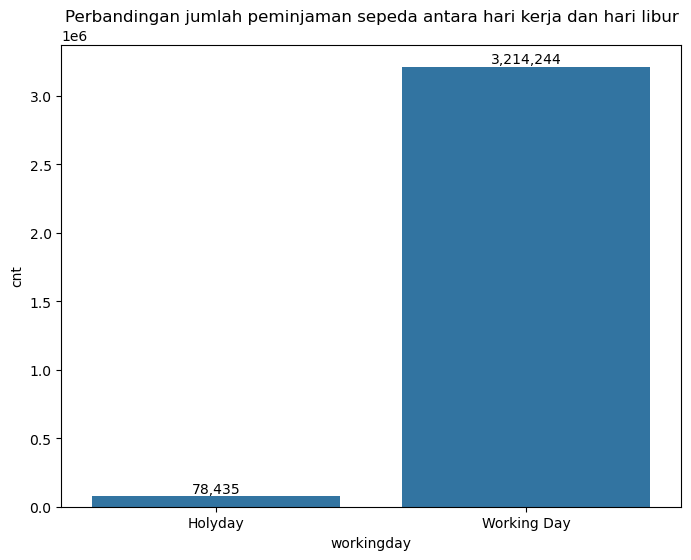

In [175]:

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x="workingday", y="cnt", data=bike_data_by_workingdays)
plt.title('Perbandingan jumlah peminjaman sepeda antara hari kerja dan hari libur')
bar_plot.set_xticklabels(['Holyday', 'Working Day'])
for index, value in enumerate(bike_data_by_workingdays["cnt"]):
    bar_plot.text(index, value, f'{int(value):,}', color='black', ha="center", va="bottom")
plt.show()

**Insight:**
- Pada barplot diatas dapat disimpulkan bahwasanya
    1) Penyewaan Sepeda didominasi pada hari kerja sebanyak 3,213,244
    2) Hari libur hanya menyumbangkan 78,435 atau  2.38% dari total peminjaman sepeda

### Bagaimana Korelasi jumlah peminjaman Sepeda dengan Faktor Eksternal (Cuaca, Suhu, dll.)?

In [179]:
weather_mapping = {
    'Clear':1,
    'Mist':2,
    'Light Snow/Rain':3,
    'Heavy Rain/Snow':4
}

bike_data['weathersit'] = bike_data['weathersit'].replace(weather_mapping)

C:\Users\HP\AppData\Local\Temp\ipykernel_11280\4184219912.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bike_data['weathersit'] = bike_data['weathersit'].replace(weather_mapping)


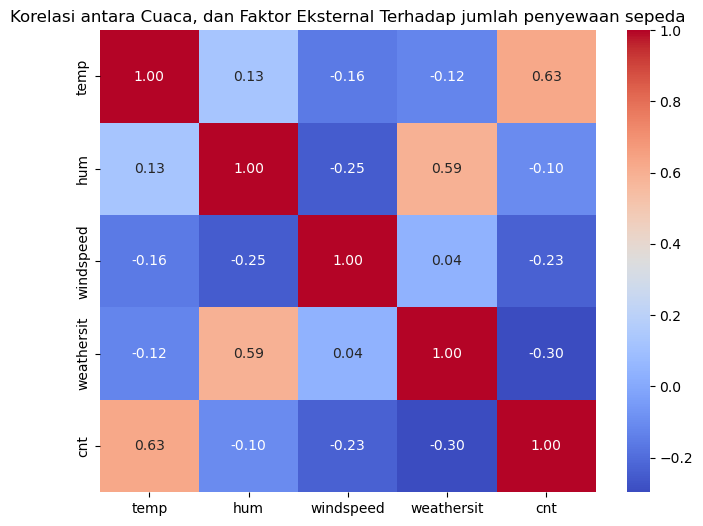

In [181]:

plt.figure(figsize=(8, 6))

sns.heatmap(bike_data[['temp', 'hum', 'windspeed', 'weathersit', 'cnt']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Cuaca, dan Faktor Eksternal Terhadap jumlah penyewaan sepeda')
plt.show()


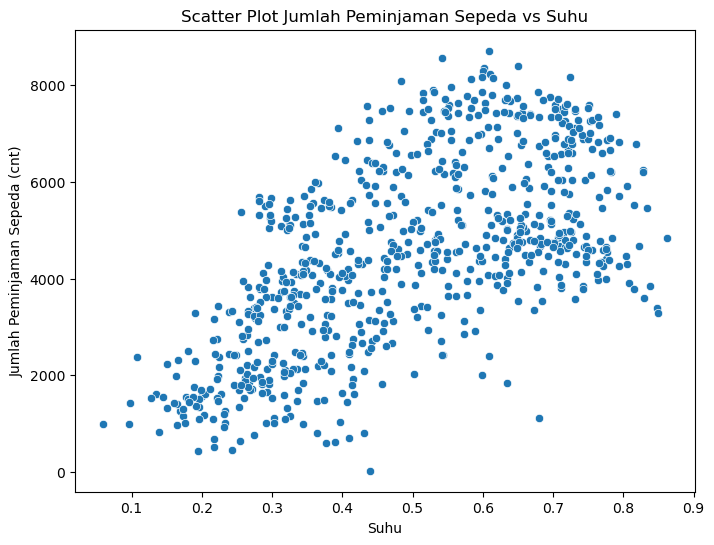

In [183]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=bike_data["temp"], y=bike_data['cnt'])
    plt.title(f'Scatter Plot Jumlah Peminjaman Sepeda vs Suhu')
    plt.xlabel("Suhu".capitalize())
    plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
    plt.show()

#### Penggunaan Clustering dengan teknik binning dalam mengelompokan data suhu

In [186]:
temp_bins = [0, 15/41, 25/41, 35/41,38/41]
temp_labels = ['Cold', 'Mild', 'Warm', 'Hot']
bike_data['temp_group'] = pd.cut(bike_data['temp'], bins=temp_bins, labels=temp_labels, right=False)

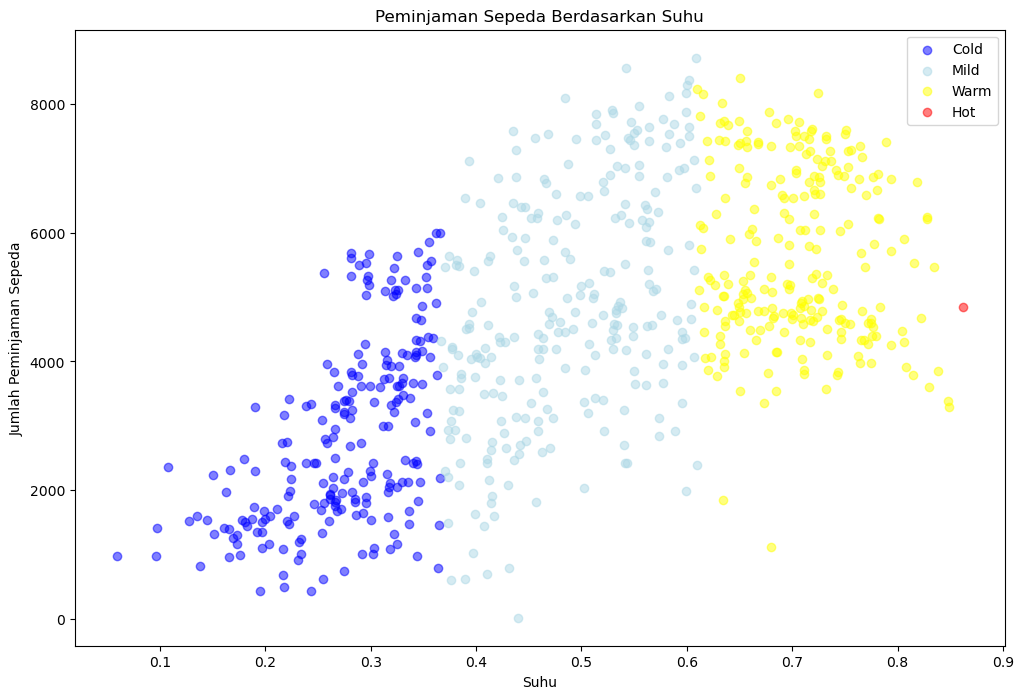

In [188]:
cold_data = bike_data[bike_data['temp_group'] == 'Cold']
mild_data = bike_data[bike_data['temp_group'] == 'Mild']
warm_data = bike_data[bike_data['temp_group'] == 'Warm']
hot_data = bike_data[bike_data['temp_group'] == 'Hot']


plt.figure(figsize=(12, 8))
plt.scatter(cold_data['temp'], cold_data['cnt'], color='blue', label='Cold', alpha=0.5)
plt.scatter(mild_data['temp'], mild_data['cnt'], color='lightblue', label='Mild', alpha=0.5)
plt.scatter(warm_data['temp'], warm_data['cnt'], color='yellow', label='Warm', alpha=0.5)
plt.scatter(hot_data['temp'], hot_data['cnt'], color='red', label='Hot', alpha=0.5)

plt.title('Peminjaman Sepeda Berdasarkan Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend()
plt.show()


**Insight:**
- Pada diagram heatmap diatas dapat disimpulkan
    1) korelasi suhu terhadap jumlah penyewaan sepeda lebih tinggi dibandingkan faktor eksternal lain
    2) faktor eksternal kecepatan angin, kelembapan, dan kondisi cuaca tidak berpengaruh pada jumlah penyewaan sepeda
- Pada diagram Scatter plot dapat disimpulkan
  1) jumlah penyewaan sepeda cenderung meningkat saat kondisi suhu meningkat


## Conclusion ( Kesimpulan )

### Kesimpulan Berdasarkan Tiga Pertanyaan Bisnis:

1. **Korelasi antara Pengguna Terdaftar dan Kasual terhadap Banyaknya Peminjaman Sepeda**:
   - Berdasarkan heatmap, pengguna terdaftar memiliki korelasi yang lebih kuat terhadap jumlah peminjaman sepeda dibandingkan dengan pengguna kasual. Ini menunjukkan bahwa pengguna terdaftar lebih sering meminjam sepeda secara signifikan dibandingkan dengan pengguna kasual. Kontribusi mereka terhadap total peminjaman jauh lebih besar, sehingga strategi bisnis bisa difokuskan pada peningkatan jumlah pengguna terdaftar.

2. **Perbedaan Jumlah Peminjaman Sepeda antara Hari Kerja dan Hari Libur**:
   - Data menunjukkan bahwa peminjaman sepeda didominasi pada hari kerja dengan total 3.213.244 peminjaman, yang mencakup mayoritas dari keseluruhan peminjaman. Sebaliknya, hari libur hanya menyumbangkan 2,38% dari total peminjaman sepeda. Ini mengindikasikan bahwa sepeda lebih banyak digunakan oleh pengguna untuk keperluan sehari-hari seperti bekerja atau bersekolah selama hari kerja.

3. **Korelasi Jumlah Peminjaman Sepeda dengan Faktor Eksternal (Cuaca, Suhu, dll.)**:
   - Dari heatmap dan scatter plot, suhu memiliki korelasi yang paling tinggi terhadap jumlah peminjaman sepeda dibandingkan faktor eksternal lainnya seperti kecepatan angin, kelembapan, dan kondisi cuaca. Peminjaman sepeda cenderung meningkat saat suhu semakin tinggi, sehingga kondisi cuaca yang lebih hangat mendorong lebih banyak peminjaman. Faktor eksternal lain seperti kecepatan angin dan kelembapan tidak terlalu mempengaruhi jumlah peminjaman.
